In [36]:
%%HTML
<style> div.prompt {display:none} </style>

In [29]:
#%matplotlib inline
%matplotlib qt5

In [4]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pandas as pd
import numpy as np
import pyodbc
import random

from matplotlib.pyplot import *

#'png','pdf','png2x','jpg','retina','svg','jpeg'
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_excel('/Users/degrave/Desktop/Intent to call and actual calls.xlsx', sheet_name='Sheet2')

In [32]:
df.dropna(inplace=True)

df.reset_index(drop=True, inplace=True)

# Daily breakdown

In [34]:
df.sort_values('dateid', ascending=True, inplace=True)

In [35]:
df['dow'] = df['dateid'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d').day_name())

In [36]:
df['dow'] = df['dow'].map({'Monday': 'weekday', 'Tuesday': 'weekday', 'Wednesday': 'weekday', 'Thursday': 'weekday',
                           'Friday': 'weekday', 'Saturday': 'weekend', 'Sunday': 'weekend'})

In [37]:
df.head()

,dateid,DeviceType,Intent to Call (40),Visits with Intent to Call,Calls,CallsPerPV,PV - bimart,Adobe,Difference,Calls/PV,Intent to call /PV,Visits with Intent to Call/ PV,dow
0,20180101,mobile,581,475,94.0,0.008,11535,11544,-0.000780,0.008149,0.050329,0.041147,weekday
1,20180102,mobile,5460,4518,2454.0,0.077,32073,32057,0.000499,0.076513,0.170322,0.140936,weekday
2,20180103,mobile,4171,3505,1955.0,0.065,29877,29877,0.000000,0.065435,0.139606,0.117314,weekday
3,20180104,mobile,3595,3067,1668.0,0.060,27681,27669,0.000434,0.060258,0.129929,0.110846,weekday
4,20180105,mobile,3607,3000,1785.0,0.070,25524,25517,0.000274,0.069934,0.141357,0.117569,weekday


In [62]:
df.head()

,dateid,DeviceType,Intent to Call (40),Visits with Intent to Call,Calls,CallsPerPV,PV - bimart,Adobe,Difference,Calls/PV,Intent to call /PV,Visits with Intent to Call/ PV,dow
432,20190310,mobile,149,150,98.0,0.011,8939,8933,0.000671,0.010963,0.016680,0.016792,weekend
324,20181122,mobile,196,151,74.0,0.013,5844,5568,0.047228,0.012663,0.035201,0.027119,weekday
425,20190303,mobile,135,156,76.0,0.008,9043,9033,0.001106,0.008404,0.014945,0.017270,weekend
418,20190224,mobile,151,160,59.0,0.007,8918,8896,0.002467,0.006616,0.016974,0.017986,weekend
397,20190203,mobile,181,167,63.0,0.007,8823,8811,0.001360,0.007140,0.020543,0.018954,weekend


In [66]:
df.sort_values('Visits with Intent to Call/ PV', ascending=True, inplace=True)

x = df['Visits with Intent to Call/ PV'].values
y = df['Calls/PV'].values

y_1 = y[x<=0.05]
x_1 = x[x<=0.05]

y_2 = y[x>=0.1]
x_2 = x[x>=0.1]

model_1 = LinearRegression(fit_intercept=False)
model_2 = LinearRegression(fit_intercept=False)

model_1.fit(x_1.reshape(-1,1), y_1)
model_2.fit(x_2.reshape(-1,1), y_2)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [67]:
print('slope_1: ', model_1.coef_[0].round(5), 'intercept_1: ', model_1.intercept_)
print('slope_2: ', model_2.coef_[0].round(5), 'intercept_2: ', model_2.intercept_)

slope_1:  0.36309 intercept_1:  0.0
slope_2:  0.62036 intercept_2:  0.0


In [40]:
f_1 = model_1.coef_*x_1 + model_1.intercept_
f_2 = model_2.coef_*x_2 + model_2.intercept_

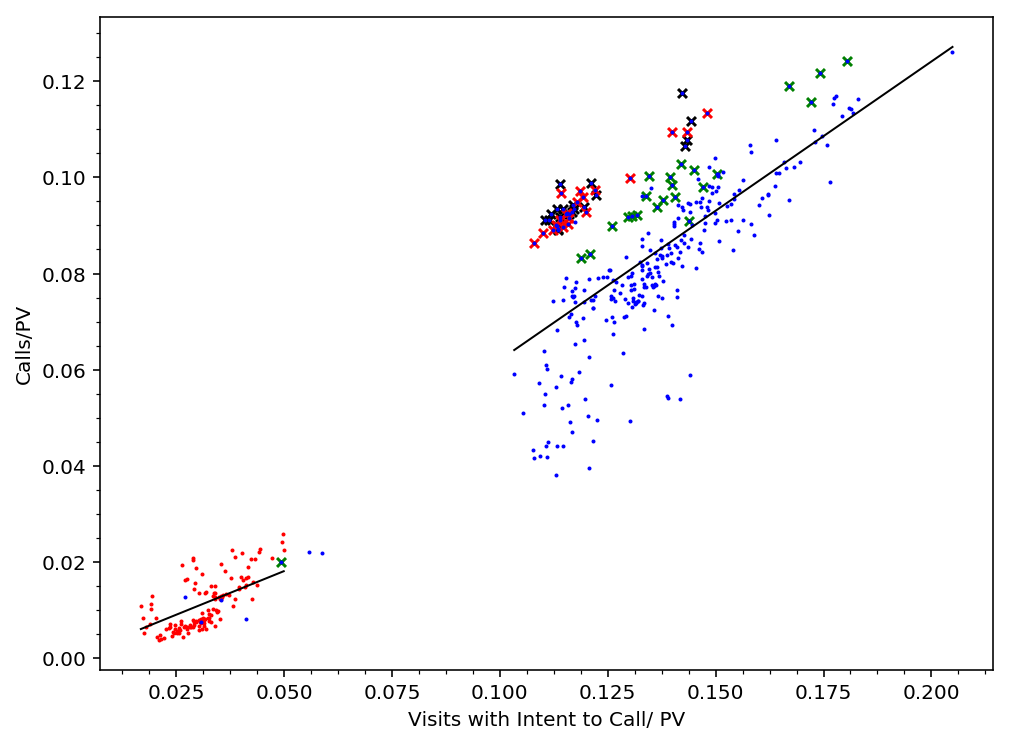

In [104]:
fig, axes = subplots(1,1,figsize=(8,6))

df[df['dow'] == 'weekend'].plot(x='Visits with Intent to Call/ PV', y='Calls/PV', style='.', color='r', ms=2, legend=False, ax=axes)
df[df['dow'] == 'weekday'].plot(x='Visits with Intent to Call/ PV', y='Calls/PV', style='.', color='b', ms=2, legend=False, ax=axes)
df[(df['dow'] == 'weekday') & (df['dateid'] >= 20190301)].plot.scatter(x='Visits with Intent to Call/ PV', y='Calls/PV', marker='x', color='k', s=20, legend=False, ax=axes)
df[(df['dow'] == 'weekday') & (df['dateid'] >= 20190201) & (df['dateid'] < 20190301)].plot.scatter(x='Visits with Intent to Call/ PV', y='Calls/PV', marker='x', color='r', s=20, legend=False, ax=axes)
df[(df['dow'] == 'weekday') & (df['dateid'] >= 20190101) & (df['dateid'] < 20190201)].plot.scatter(x='Visits with Intent to Call/ PV', y='Calls/PV', marker='x', color='g', s=20, legend=False, ax=axes)

plot(x_1, f_1, linestyle='-', color='k', linewidth=1)
plot(x_2, f_2, linestyle='-', color='k', linewidth=1)

xlabel('Visits with Intent to Call/ PV')
ylabel('Calls/PV')
minorticks_on()

In [49]:
df[df['dow'] == 'weekday']['Calls'].divide(df[df['dow'] == 'weekday']['Visits with Intent to Call']).mean()

0.6171310483847581

# Weekly breakdown

In [12]:
df.sort_values('dateid', ascending=True, inplace=True)

df = df[df['dow'] == 'weekday'].reset_index(drop=True)

df['datetime'] = df['dateid'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [13]:
df['week'] = df['datetime'].dt.week

y = df.groupby('week')['Calls/PV'].mean().values
x = df.groupby('week')['Visits with Intent to Call/ PV'].mean().values

yr = pd.DataFrame(y).pct_change().dropna().reset_index(drop=True)[0].values
xr = pd.DataFrame(x).pct_change().dropna().reset_index(drop=True)[0].values

In [14]:
dt_normal = pd.DataFrame({'x': x, 'y': y}).dropna().reset_index(drop=True)
dt_ratios = pd.DataFrame({'xr': xr, 'yr': yr}).dropna().reset_index(drop=True)

In [15]:
model = LinearRegression(fit_intercept=False)

model.fit(x.reshape(-1,1), y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [16]:
x_fit = np.linspace(np.min(x), np.max(x), 100)

f = model.coef_*x_fit + model.intercept_

In [17]:
print('slope:', model.coef_[0].round(5), 'intercept:', model.intercept_)

slope: 0.61472 intercept: 0.0


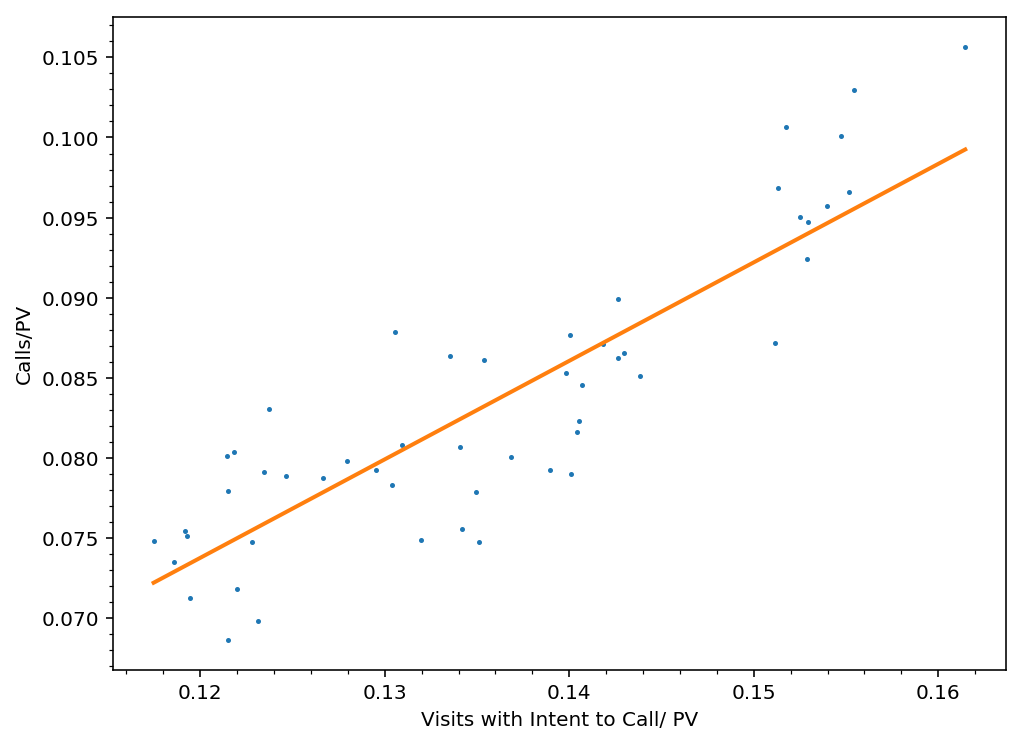

In [18]:
fig, axes = subplots(1,1,figsize=(8,6))

plot(x, y, '.', markersize=3)
plot(x_fit, f, linestyle='-', linewidth=2)

xlabel('Visits with Intent to Call/ PV')
ylabel('Calls/PV')
minorticks_on()

In [20]:
model = LinearRegression(fit_intercept=False)

model.fit(xr.reshape(-1,1),yr)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [21]:
x_fit = np.linspace(np.min(xr), np.max(xr), 100)

f = model.coef_*x_fit + model.intercept_

In [22]:
print('slope:', model.coef_[0].round(5), 'intercept:', model.intercept_)

slope: 1.08323 intercept: 0.0


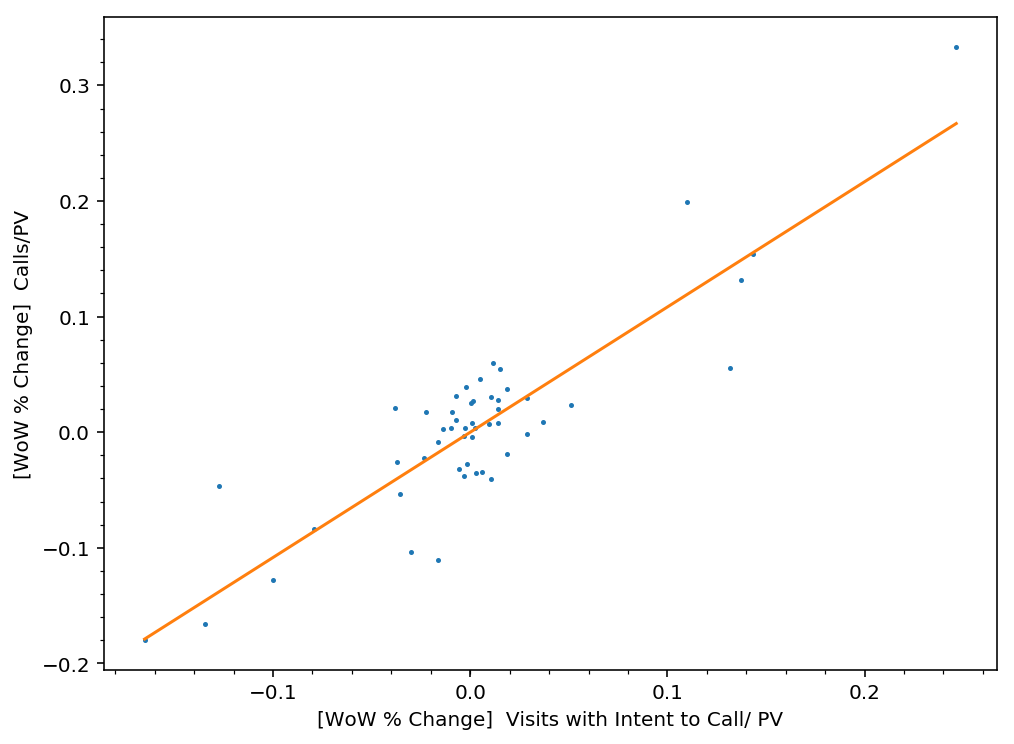

In [23]:
fig, axes = subplots(1,1,figsize=(8,6))

plot(xr, yr, '.', markersize=3)
plot(x_fit, f)

xlabel('[WoW % Change]  Visits with Intent to Call/ PV')
ylabel('[WoW % Change]  Calls/PV')
minorticks_on()

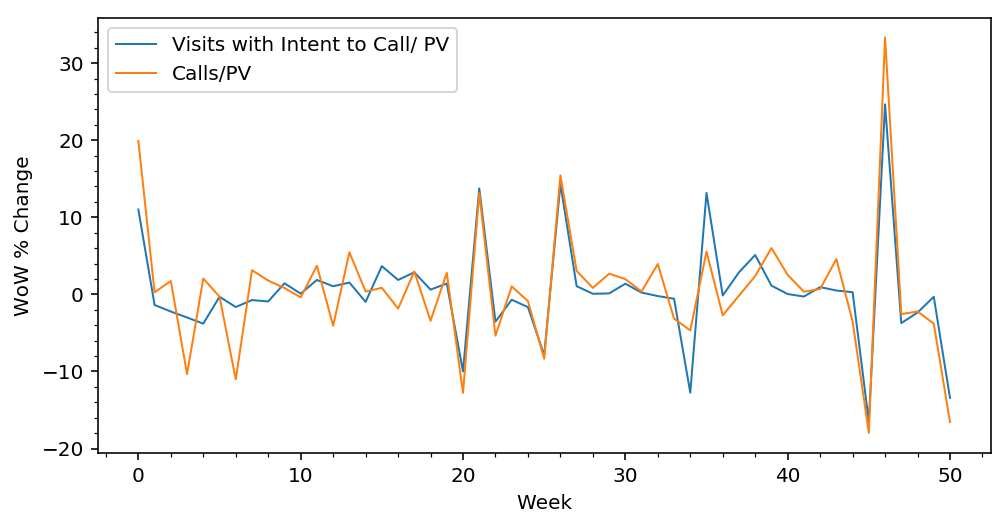

In [24]:
fig, axes = subplots(1,1,figsize=(8,4))

plot(xr*100, lw=1)
plot(yr*100, lw=1)

xlabel('Week')
ylabel('WoW % Change')
legend(['Visits with Intent to Call/ PV', 'Calls/PV'])
minorticks_on()

In [25]:
print(np.corrcoef(x,y)[0][1].round(5))
print(np.corrcoef(xr,yr)[0][1].round(5))

0.87917
0.88371


In [30]:
df = pd.read_excel('/Users/degrave/Healthgrades/intent_to_call/Intent to call and actual calls.xlsx', sheet_name='Sheet2')

In [31]:
plot(df['Visits with Intent to Call'], df['Calls'], '.')